<a href="https://colab.research.google.com/github/anushkaa66/BML/blob/main/BML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone "https://github.com/anushkaa66/BML.git"

Cloning into 'BML'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 63.62 KiB | 2.54 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv(r"/content/drive/MyDrive/hi.csv")  # Ensure the file path is correct
print("First 5 rows of data:")
print(df.head())

# Data Cleaning
df.dropna()  # Drop rows with missing values
df.drop_duplicates()  # Drop duplicate rows
print("\nData after cleaning:")
print(df)

# Dataset Info
print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nChecking for Null Values:")
print(df.isnull().sum())

from sklearn.preprocessing import OrdinalEncoder
# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = ordinal_encoder.fit_transform(df[categorical_columns])
print("\nData after encoding categorical columns:")
print(df.head())

# Feature Scaling (Normalization & Standardization)
# Selecting only numerical columns for scaling
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("\nNumerical Columns for Scaling:", numeric_columns)

# Normalization
normalizer = MinMaxScaler()
normalized_data = normalizer.fit_transform(df[numeric_columns])

# Standardization
standardizer = StandardScaler()
standardized_data = standardizer.fit_transform(df[numeric_columns])

# Print Results
#print("\nOriginal Data (Numerical Columns):\n", df[numeric_columns].head())
#print("\nNormalized Data (First 5 Rows):\n", normalized_data[:5])
#print("\nStandardized Data (First 5 Rows):\n", standardized_data[:5])

# Feature and Target Selection
# Feature and Target Selection
X = df[['Hypertension','Diabetes','Resting_BP','ECG_Results']].values  # Features # Use square brackets to select columns
y = df['Heart_Attack_Risk'].values  # Target

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation
model.score(X_test, y_test)




First 5 rows of data:
   Age  Gender  Smoking  Alcohol_Consumption Physical_Activity_Level    BMI  \
0   69  Female        1                    0                Moderate  34.61   
1   32    Male        0                    0                Moderate  22.75   
2   89    Male        0                    1                Moderate  35.32   
3   78    Male        0                    1                Moderate  18.23   
4   38  Female        1                    0                Moderate  19.82   

   Diabetes  Hypertension  Cholesterol_Level  Resting_BP  Heart_Rate  \
0         1             0              152.1         171          85   
1         0             0              166.8         126         103   
2         0             0              272.3         123         127   
3         1             0              237.7         144         125   
4         0             0              207.7         123         107   

   Family_History Stress_Level Chest_Pain_Type        Thalassemia  \
0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5044666666666666

In [3]:
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB


dataset = load_iris()

# Initialize and fit the model
model = GaussianNB()
model.fit(dataset.data, dataset.target)

# Make predictions
expected = dataset.target
predicted = model.predict(dataset.data)

accuracy = metrics.accuracy_score(expected, predicted)
print("Accuracy:", accuracy)

# Print confusion matrix
confusion_matrix = metrics.confusion_matrix(expected, predicted)
print("Confusion Matrix:\n", confusion_matrix)


Accuracy: 0.96
Confusion Matrix:
 [[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


[True, False, false] [False, true , true] [False, true , true]

regression- linear

Model Accuracy (R² score): 0.14


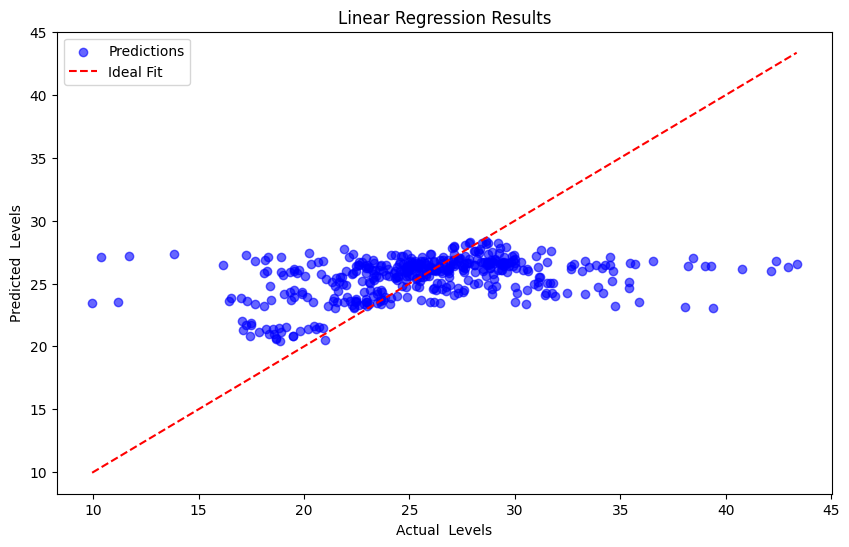

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/drive/MyDrive/Crop_recommendation.csv'
data = pd.read_csv(file_path)

# Encode categorical features directly
data['rainfall'] = data['rainfall'].astype('category').cat.codes

# Define features and target
features = ['N',	'P',	'K',	'humidity','ph','rainfall']
target = 'temperature'
X, y = data[features], data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model and make predictions in one go
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print accuracy (R² score)
print(f"Model Accuracy (R² score): {r2:.2f}")

# Plot results
plt.figure(figsize=(10, 6))
#sets the size of the figure
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predictions')
#Create a scatter plot of actual vs. predicted cholesterol levels.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
#Plot a red dashed line representing perfect predictions.
plt.xlabel("Actual  Levels")
#name of the x axes
plt.ylabel("Predicted  Levels")
#name of the y axes
plt.title("Linear Regression Results")
#title of the graph
plt.legend()
plt.show()




CLASSIFICATION REPORT

In [5]:
# Instead of classification_report, use regression metrics like:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error: 21.11
R-squared (R²): 0.14


SKILL EXPERIMENT 5

DECISION TREE USING WITHOUT FORMULA

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split

# Load and prepare the new dataset
data = pd.read_csv("/content/drive/MyDrive/Play-Golf")

# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Define features (X) and target (y)
X = data.drop('play golf ', axis=1)
y = data['play golf ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print("Accuracy:", accuracy)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Play-Golf'

DECISION TREE WITH FORUMLA

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load and prepare the dataset
data = pd.read_csv("/content/drive/MyDrive/Play-Golf.csv")

# Encode categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Define features (X) and target (y)
X = data.drop('play golf ', axis=1)
y = data['play golf ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Helper functions for entropy and information gain
def entropy(y):
    proportions = np.bincount(y) / len(y)
    return -np.sum([p * np.log2(p) for p in proportions if p > 0])

def information_gain(y, left_indices, right_indices):
    parent_entropy = entropy(y)
    left_entropy = entropy(y[left_indices])
    right_entropy = entropy(y[right_indices])
    n = len(y)
    n_left, n_right = len(left_indices), len(right_indices)
    weighted_entropy = (n_left / n) * left_entropy + (n_right / n) * right_entropy
    return parent_entropy - weighted_entropy

# Building the Decision Tree
class DecisionTreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTreeClassifierScratch:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping criteria
        if depth >= self.max_depth or n_labels == 1 or n_samples < 2:
            leaf_value = np.bincount(y).argmax()
            return DecisionTreeNode(value=leaf_value)

        # Find the best split
        best_gain = -1
        split_idx, split_threshold = None, None
        for feature_idx in range(n_features):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_indices = np.where(X[:, feature_idx] <= threshold)[0]
                right_indices = np.where(X[:, feature_idx] > threshold)[0]
                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue
                gain = information_gain(y, left_indices, right_indices)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_idx
                    split_threshold = threshold

        # Split data
        left_indices = np.where(X[:, split_idx] <= split_threshold)[0]
        right_indices = np.where(X[:, split_idx] > split_threshold)[0]
        left_child = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_child = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
        return DecisionTreeNode(feature=split_idx, threshold=split_threshold, left=left_child, right=right_child)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

# Convert training data to NumPy arrays for custom implementation
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values

# Train the custom Decision Tree Classifier
tree = DecisionTreeClassifierScratch(max_depth=3)
tree.fit(X_train_np, y_train_np)

# Make predictions
y_pred = tree.predict(X_test_np)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test.values)
print("Accuracy:", accuracy)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Play-Golf.csv'

SKILL EXPERIMENT 7

KNN WITH READYMADE LIB

In [ ]:
#Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/hi.csv"
data = pd.read_csv(file_path)

# Encode categorical features
label_cols = ['Gender', 'Physical_Activity_Level', 'Stress_Level', 'Chest_Pain_Type',
              'Thalassemia', 'ECG_Results', 'Heart_Attack_Risk']

le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])

# Define features and target
features = ['Age', 'BMI', 'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Max_Heart_Rate_Achieved',
            'Smoking', 'Alcohol_Consumption', 'Diabetes', 'Hypertension', 'Fasting_Blood_Sugar',
            'Family_History', 'Gender', 'Physical_Activity_Level', 'Stress_Level', 'Chest_Pain_Type',
            'Thalassemia', 'ECG_Results', 'Exercise_Induced_Angina']

target = 'Heart_Attack_Risk'
X, y = data[features], data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- KNN Classifier ---
k = 5  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# --- Evaluate KNN Model ---
knn_acc = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_acc * 100:.2f}%")
print("KNN Report:\n", classification_report(y_test, y_pred_knn))

# --- Feature Importance for KNN using Permutation ---
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(knn_model, X_test, y_test, n_repeats=5, random_state=42)

# Plot Permutation Feature Importance
feature_importance_knn = perm_importance.importances_mean
plt.figure(figsize=(12, 6))
plt.barh(features, feature_importance_knn, color='lightcoral')
plt.xlabel('Feature Importance (KNN)')
plt.ylabel('Features')
plt.title('Permutation Feature Importance - KNN')
plt.show()


KNN DONE MANUALLY

In [13]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv(r"/content/archive (2).csv")

# Feature columns: all columns except 'Outcome' (the target column)
X = df.drop('Outcome', axis=1).values  # Features
y = df['Outcome'].values  # Target variable (Outcome)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Euclidean Distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# KNN Classifier function (manually)
def knn(X_train, y_train, X_test, k=3):
    predictions = []

    # For each test point
    for test_point in X_test:
        distances = []

        # Calculate the distance to every training point
        for i, train_point in enumerate(X_train):
            distance = euclidean_distance(test_point, train_point)
            distances.append((distance, i))

        # Sort the distances and pick the k closest points
        distances.sort(key=lambda x: x[0])
        nearest_neighbors = distances[:k]AZ

        # Get the labels of the nearest neighbors
        neighbor_labels = [y_train[i] for _, i in nearest_neighbors]

        # Get the most common class label (majority vote)
        most_common = Counter(neighbor_labels).most_common(1)
        predictions.append(most_common[0][0])  # Add the predicted class

    return np.array(predictions)

# Train and make predictions using manual KNN
k = 5  # You can change this to any value for 'k'
predictions = knn(X_train, y_train, X_test, k)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)

# Print confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

SyntaxError: invalid syntax (<ipython-input-13-221b3de3b146>, line 35)

K MEANS CLUSTERING. MANUAL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv(r"/content/archive (2).csv")

# Feature columns: all columns except 'Outcome' (the target column)
X = df.drop('Outcome', axis=1).values  # Features

# Feature Scaling: Scaling features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

# Manual K-Means clustering implementation
def initialize_centroids(X, k):
    """Randomly initialize k centroids"""
    np.random.seed(42)  # Set seed for reproducibility
    random_indices = np.random.choice(X.shape[0], size=k, replace=False)
    return X[random_indices]

def assign_clusters(X, centroids):
    """Assign each point to the nearest centroid"""
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    """Update centroids to be the mean of points in each cluster"""
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i] = X[labels == i].mean(axis=0)
    return centroids

def kmeans(X, k, max_iters=100, tol=1e-4):
    """Main K-Means algorithm"""
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)

        # Check for convergence (if centroids don't change significantly)
        if np.all(np.abs(new_centroids - centroids) < tol):
            print(f"Convergence reached after {i+1} iterations.")
            break
        centroids = new_centroids

    return centroids, labels

# Run K-Means manually
k = 3  # Number of clusters
centroids, labels = kmeans(X_scaled, k)

# Print the cluster centers (centroids)
print("Cluster Centers (Centroids):\n", centroids)

# Print the number of samples in each cluster
unique, counts = np.unique(labels, return_counts=True)
print("Cluster Sizes:", dict(zip(unique, counts)))

# Visualize the clustering (for 2D visualization, using only the first two features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("Manual K-Means Clustering")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

K MEANS WITH READYMADE LIBRARY

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np  # Import numpy to use np.unique

# Load the dataset
df = pd.read_csv(r"/content/archive (2).csv")

# Feature columns: all columns except 'Outcome' (the target column)
X = df.drop('Outcome', axis=1).values  # Features

# Feature Scaling: It's a good practice to scale features for K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

# Apply K-Means clustering with k=3 (for example, we choose 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Print the cluster centers (centroids)
print("Cluster Centers (Centroids):\n", kmeans.cluster_centers_)

# Print the number of samples in each cluster
unique, counts = np.unique(labels, return_counts=True)
print("Cluster Sizes:", dict(zip(unique, counts)))

# Visualize the clustering (optional, for 2D visualization)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Import OneHotEncoder
import numpy as np  # Import numpy to use np.unique

# Load the dataset
df = pd.read_csv(r"/content/drive/MyDrive/bank.csv")

# Check if 'deposit' is the actual target column name and modify accordingly
# Print the available columns to confirm the target column name
print(df.columns)

# Assuming 'deposit' is the target column name (replace if different)
X = df.drop('deposit', axis=1)  # Features (keep as DataFrame for OneHotEncoding)

# Identify categorical features (assuming 'object' dtype)
categorical_features = X.select_dtypes(include=['object']).columns

# One-Hot Encoding for categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Create OneHotEncoder instance
encoded_data = encoder.fit_transform(X[categorical_features]) # Fit and transform categorical features

# Create a DataFrame for encoded data with appropriate column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical columns and concatenate encoded columns
X = X.drop(categorical_features, axis=1)
X = pd.concat([X, encoded_df], axis=1)

# Convert X to a NumPy array for StandardScaler
X = X.values

# Feature Scaling: It's a good practice to scale features for K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

# Apply K-Means clustering with k=3 (for example, we choose 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Print the cluster centers (centroids)
print("Cluster Centers (Centroids):\n", kmeans.cluster_centers_)

# Print the number of samples in each cluster
unique, counts = np.unique(labels, return_counts=True)
print("Cluster Sizes:", dict(zip(unique, counts)))

# Visualize the clustering (optional, for 2D visualization)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

EXPERIMENT NO 9 : PCA IMPLEMENTATION


*standardize dataset
*find covariance matrix
*find eigen vector & eigen values
*sort & select top eigen values & fake corresponding eigen vectors
*multiply this eigen vectors with step 1) standardize dataset

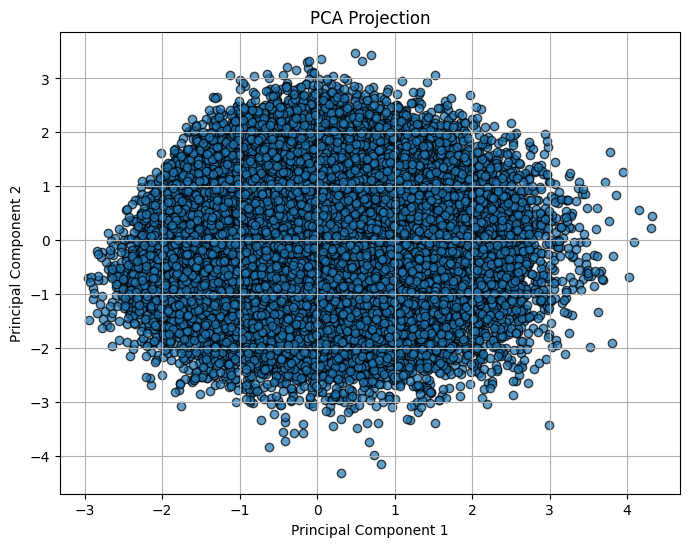

Transformed Dataset (PCA Components):
         PC1       PC2
0  0.097184 -0.647635
1 -1.057332 -0.405338
2 -1.037083  0.403340
3  0.390353 -2.234261
4 -1.501760 -0.516215


In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "/content/drive/MyDrive/hi.csv"
df = pd.read_csv(file_path)

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['number']).copy()

# Step 1: Standardize the dataset
scaler = StandardScaler()
X_standardized = scaler.fit_transform(df_numeric)

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)

# Step 3: Compute eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

# Step 4: Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigen_values)[::-1]
top_eigen_values = eigen_values[sorted_indices]
top_eigen_vectors = eigen_vectors[:, sorted_indices]

# Step 5: Select top k components (e.g., 2 principal components)
k = 2
selected_eigen_vectors = top_eigen_vectors[:, :k]

# Step 6: Project the standardized data onto the selected eigenvectors
X_pca = np.dot(X_standardized, selected_eigen_vectors)

# Convert PCA result into a DataFrame
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(k)])

# Step 7: Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, edgecolors='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection")
plt.grid()
plt.show()

# Display transformed dataset
print("Transformed Dataset (PCA Components):\n", df_pca.head())


PCA USING LIBRARY

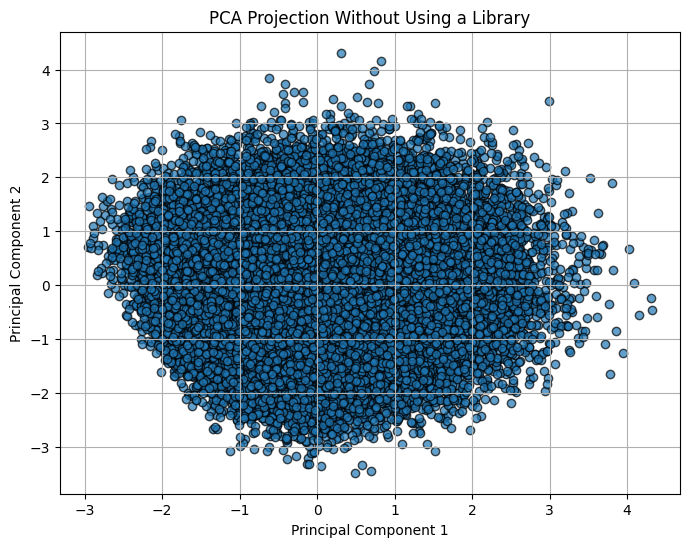

Transformed Dataset (PCA Components):
         PC1       PC2
0  0.097184  0.647635
1 -1.057332  0.405338
2 -1.037083 -0.403340
3  0.390353  2.234261
4 -1.501760  0.516215


In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
file_path = "/content/drive/MyDrive/hi.csv"
df = pd.read_csv(file_path)

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['number']).copy()

# Step 1: Standardize the dataset
scaler = StandardScaler()
X_standardized = scaler.fit_transform(df_numeric)

# Step 2: Apply PCA
k = 2  # Number of principal components
pca = PCA(n_components=k)
X_pca = pca.fit_transform(X_standardized)

# Convert PCA result into a DataFrame
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(k)])

# Step 3: Plot PCA without library functions
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, edgecolors='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection Without Using a Library")
plt.grid()
plt.show()

# Display transformed dataset
print("Transformed Dataset (PCA Components):\n", df_pca.head())


MERGING OF BOTH OUTPUTS

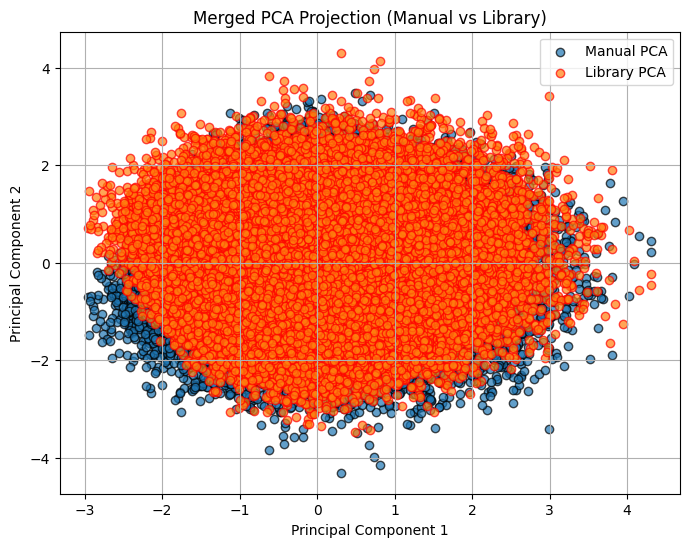

Transformed Dataset (Manual PCA Components):
    PC1_manual  PC2_manual
0    0.097184   -0.647635
1   -1.057332   -0.405338
2   -1.037083    0.403340
3    0.390353   -2.234261
4   -1.501760   -0.516215
Transformed Dataset (Library PCA Components):
    PC1_library  PC2_library
0     0.097184     0.647635
1    -1.057332     0.405338
2    -1.037083    -0.403340
3     0.390353     2.234261
4    -1.501760     0.516215


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
file_path = "/content/drive/MyDrive/hi.csv"
df = pd.read_csv(file_path)

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['number']).copy()

# Step 1: Standardize the dataset
scaler = StandardScaler()
X_standardized = scaler.fit_transform(df_numeric)

# PCA without library
# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)

# Step 3: Compute eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

# Step 4: Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigen_values)[::-1]
top_eigen_values = eigen_values[sorted_indices]
top_eigen_vectors = eigen_vectors[:, sorted_indices]

# Step 5: Select top k components (e.g., 2 principal components)
k = 2
selected_eigen_vectors = top_eigen_vectors[:, :k]

# Step 6: Project the standardized data onto the selected eigenvectors
X_pca_manual = np.dot(X_standardized, selected_eigen_vectors)

# PCA using library
pca = PCA(n_components=k)
X_pca_library = pca.fit_transform(X_standardized)

# Convert PCA results into DataFrames
df_pca_manual = pd.DataFrame(X_pca_manual, columns=[f"PC{i+1}_manual" for i in range(k)])
df_pca_library = pd.DataFrame(X_pca_library, columns=[f"PC{i+1}_library" for i in range(k)])

# Step 7: Plot merged PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_manual[:, 0], X_pca_manual[:, 1], alpha=0.7, edgecolors='k', label='Manual PCA')
plt.scatter(X_pca_library[:, 0], X_pca_library[:, 1], alpha=0.7, edgecolors='r', label='Library PCA')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Merged PCA Projection (Manual vs Library)")
plt.legend()
plt.grid()
plt.show()

# Display transformed datasets
print("Transformed Dataset (Manual PCA Components):\n", df_pca_manual.head())
print("Transformed Dataset (Library PCA Components):\n", df_pca_library.head())
